# CHAPTER 3
**CNN and RNN Using PyTorch**

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

torch.manual_seed(1)

## Recipe 3-6. Implementing a Convolutional Neural Network (CNN)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.uint8


D:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


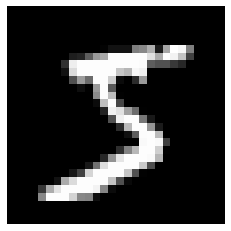

In [2]:
# hyper-parameters
EPOCHES = 1000
# the nubmer of samples at a time to pass the epoch
BATCH_SIZE = 50
# learning rate
LEARNING_RATE = 0.001
# download mnist
mnist_data = torchvision.datasets.MNIST(
    root='../data/',
    train=True,
    transform=torchvision.transforms.ToTensor()
)

print(mnist_data.data.shape)
print(mnist_data.targets.shape)
print(mnist_data.data.dtype)
plt.imshow(mnist_data.data[0].numpy(), cmap='gray')
plt.axis('off')
plt.show()

In [3]:
mnist_training_loader = DataLoader(
    dataset=mnist_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
mnist_testing_data = torchvision.datasets.MNIST(
    root='../data/',
    train=False
)
mnist_testing_x = Variable(
    torch.unsqueeze(mnist_testing_data.data, dim=1)
).type(torch.FloatTensor)
mnist_testing_y = mnist_testing_data.targets
print(mnist_testing_x.shape)
print(mnist_testing_y.shape)
print(mnist_testing_x.dtype)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])
torch.float32


In [4]:
# Convolutional Neural Networks
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(     # input.shape = (1, 28, 28)
            nn.Conv2d(
                in_channels=1,          # input height
                out_channels=16,        # n filters
                kernel_size=5,          # filter.shape = (5, 5)
                stride=1,               # filter step
                padding=2
            ),                          # output.shape = (16, 28, 28)
            nn.ReLU(),                  # activations
            nn.MaxPool2d(kernel_size=2) # output.shape = (16, 14, 14)
        )
        self.conv2 = nn.Sequential(     # input.shape = (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2), # output.shape = (32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2)
        )                               # output.shape = (32, 7, 7)
        self.out = nn.Linear(32 * 7 * 7, 10) # fully connected layer
    
    def forward(self, image):
        x = self.conv1(image)
        x = self.conv2(x)
        x = x.view(x.shape[0], -1)
        output = self.out(x)
        return output, x

In [5]:
cnn = CNN()
print(cnn)
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [6]:
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(255 * s // 9)
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title("Visualize last layer")
    plt.pause(1)
plt.ion()

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 0 | train loss = 2.3034 | test accuracy = 1222 / 10000


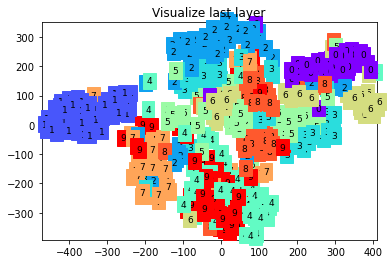

Epoch: 0 | train loss = 0.5555 | test accuracy = 8999 / 10000


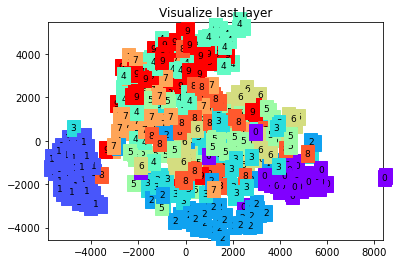

Epoch: 0 | train loss = 0.1277 | test accuracy = 9491 / 10000


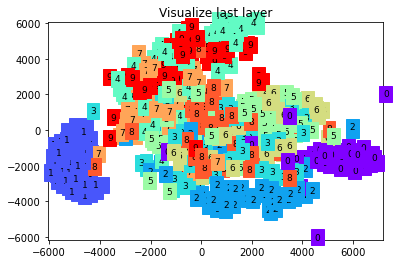

Epoch: 0 | train loss = 0.0553 | test accuracy = 9615 / 10000


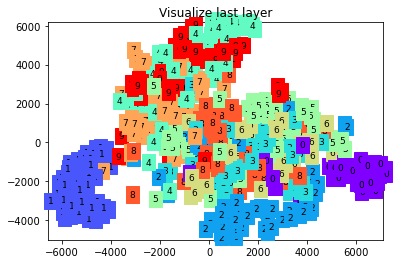

Epoch: 0 | train loss = 0.0349 | test accuracy = 9682 / 10000


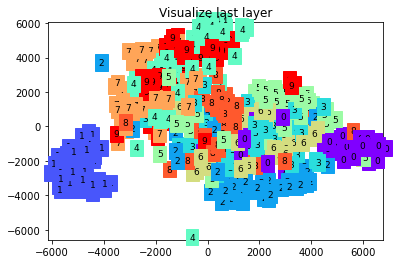

Epoch: 0 | train loss = 0.1815 | test accuracy = 9709 / 10000


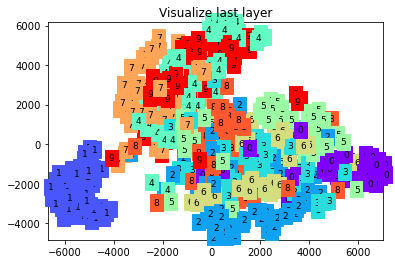

Epoch: 0 | train loss = 0.0187 | test accuracy = 9749 / 10000


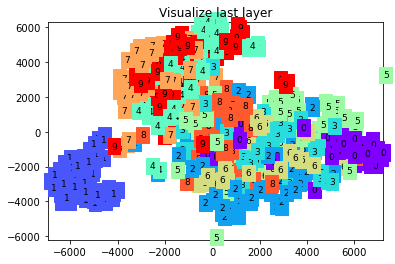

Epoch: 0 | train loss = 0.0927 | test accuracy = 9745 / 10000


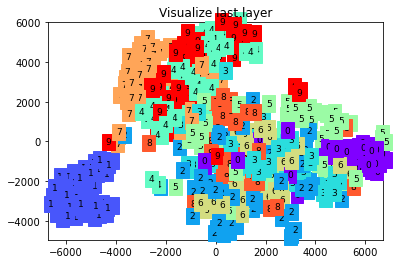

Epoch: 0 | train loss = 0.0372 | test accuracy = 9749 / 10000


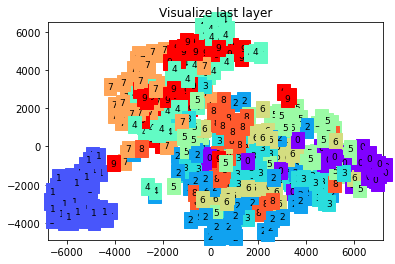

Epoch: 0 | train loss = 0.0983 | test accuracy = 9796 / 10000


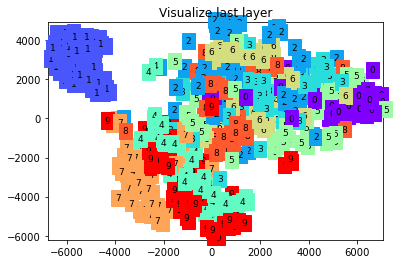

Epoch: 0 | train loss = 0.1917 | test accuracy = 9827 / 10000


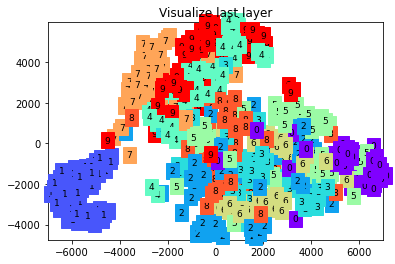

Epoch: 0 | train loss = 0.0213 | test accuracy = 9818 / 10000


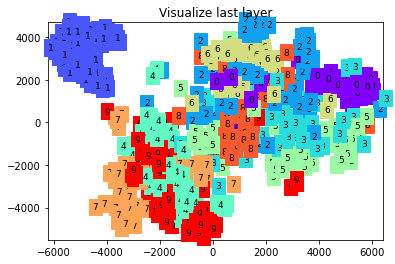

In [7]:
for epoch in range(5):
    for step, (x, y) in enumerate(mnist_training_loader):
        # batch_x.shape = (BATCH_SIZE, 1, row, col)
        # batch_x.dtype = float
        batch_x = Variable(x)
        # batch_y.shape = (BATCH_SIZE)
        batch_y = Variable(y)
        
        # output.shape = (BATCH_SIZE, 10)
        output, _ = cnn(batch_x)
        loss = loss_fn(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0 and epoch == 0:
            test_y_pred, last_layer = cnn(mnist_testing_x)
            test_y_pred = torch.max(test_y_pred, dim=1).indices
            accuracy = (test_y_pred == mnist_testing_y).sum()
            print('Epoch: {} | train loss = {:.4f} | test accuracy = {} / {}'.
                  format(epoch, loss.data, accuracy, mnist_testing_y.shape[0]))

            tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
            plot_only = 500
            low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
            labels = mnist_testing_y.numpy()[:plot_only]
            plot_with_labels(low_dim_embs, labels)

plt.ioff()

## Recipe 3-7. Reloading a Model
Store and re-upload a model that has already been trained.